## parameters

In [17]:
import numpy as np
import random
import csv
import time
import matplotlib.pyplot as plt

# Define Bat Algorithm parameters
num_bats = 100
max_iterations = 200
frequency_min = 0.0
frequency_max = 2.5
alpha = 0.97
gamma = 0.9
initial_loudness = 1.0
initial_pulse_rate = 0.5

# Define the search space boundaries
search_space = [(0, 100), (0, 100)]


## fitness function

In [18]:
def fitness(data, position, label):
    centroid_x, centroid_y = position
    distances = 0
    for row in data:
        if row['Class'] == label:
            distances += ((row['x'] - centroid_x) ** 2 + (row['y'] - centroid_y) ** 2) ** 0.5
    return distances


## Bat Algorithm function

In [19]:
def BatAlgorithm(data, label):
    # Initialize bat positions randomly within search space
    positions = np.random.uniform(low=search_space[0][0], high=search_space[0][1], size=(num_bats, 2))
    velocities = np.zeros_like(positions)
    frequencies = np.zeros(num_bats)
    loudness = np.full(num_bats, initial_loudness)
    pulse_rate = np.full(num_bats, initial_pulse_rate)

    # Initialize the global best position
    gbest_position = positions[np.argmin([fitness(data, pos, label) for pos in positions])]
    gbest_fitness = fitness(data, gbest_position, label)
    tolerance = 0.001  # Early stopping tolerance

    fitness_over_time = []

    # Main loop of the Bat Algorithm
    for iteration in range(max_iterations):
        for i in range(num_bats):
            frequencies[i] = frequency_min + (frequency_max - frequency_min) * random.random()
            velocities[i] += (positions[i] - gbest_position) * frequencies[i]
            positions[i] += velocities[i]

            if random.random() > pulse_rate[i]:
                positions[i] = gbest_position + 0.001 * np.random.randn(2)

            # Ensure positions are within bounds
            positions[i] = np.clip(positions[i], search_space[0][0], search_space[0][1])

            # Evaluate fitness and update personal and global bests
            current_fitness = fitness(data, positions[i], label)
            if current_fitness < gbest_fitness and loudness[i] > random.random():
                gbest_position = positions[i].copy()
                gbest_fitness = current_fitness
                loudness[i] *= alpha
                pulse_rate[i] *= (1 - np.exp(-gamma * iteration))

        fitness_over_time.append(gbest_fitness)

        # Early stopping condition
        if gbest_fitness < tolerance:
            break

    return gbest_position, fitness_over_time  # Return the final global best position and fitness over time


## read the dataset

In [20]:
def read_dataset(filename):
    with open(filename, mode='r') as file:
        reader = csv.DictReader(file)
        return [dict(row, **{'x': float(row['x']), 'y': float(row['y'])}) for row in reader]


## compute centroids for each class label

In [21]:
def compute_centroids(data, label):
    centroid, fitness_over_time = BatAlgorithm(data, label)
    return centroid, fitness_over_time


## main script 

In [22]:
start_time = time.time()
dataset = read_dataset('/Users/angelesmarin/Desktop/4Cluster2Ddataset.csv')

# Collect centroids for each class label
centroid_A, fitness_A = compute_centroids(dataset, 'A')
centroid_B, fitness_B = compute_centroids(dataset, 'B')
centroid_C, fitness_C = compute_centroids(dataset, 'C')
centroid_D, fitness_D = compute_centroids(dataset, 'D')

# Print final centroids for each label
print("Final Centroids:")
print(f"Label A: {centroid_A}")
print(f"Label B: {centroid_B}")
print(f"Label C: {centroid_C}")
print(f"Label D: {centroid_D}")

print(f"Time taken (seconds): {time.time() - start_time}")


Final Centroids:
Label A: [70.87421205 29.60752891]
Label B: [70.2070041  70.20200993]
Label C: [30.11325561 30.4489221 ]
Label D: [29.67877705 69.94178556]
Time taken (seconds): 58.936469078063965


## fitness function values over iterations

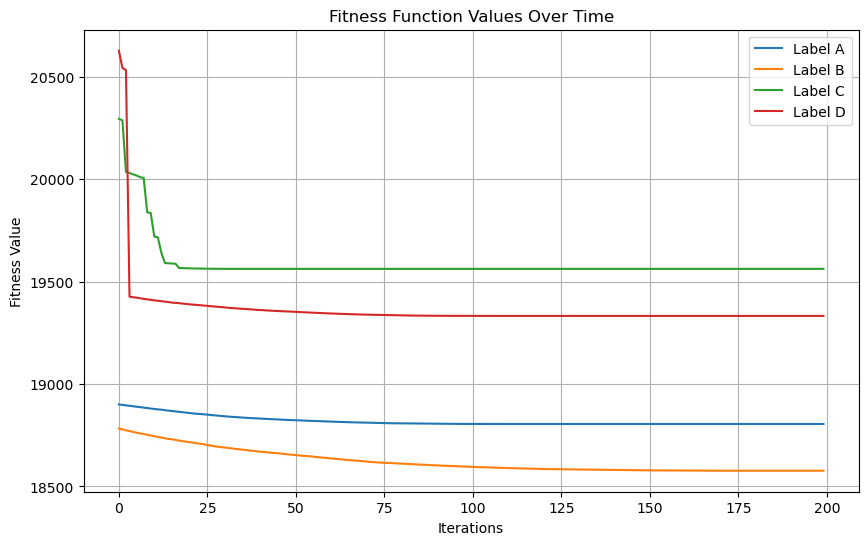

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(fitness_A, label='Label A')
plt.plot(fitness_B, label='Label B')
plt.plot(fitness_C, label='Label C')
plt.plot(fitness_D, label='Label D')
plt.xlabel('Iterations')
plt.ylabel('Fitness Value')
plt.title('Fitness Function Values Over Time')
plt.legend()
plt.grid(True)
plt.show()

### The fitness values for all labels decrease over time, indicating that the algorithm is converging toward better solutions
### The fitness values stabilize after a certain number of iterations, suggesting that the algorithm has found near-optimal solutions and is not making significant improvements afterward
### shows effective convergence for all labels, as the fitness values for each label decrease and stabilize over time. This suggests that the algorithm can find good solutions and improve them over iterations

In [ ]:
def read_dataset(filename):
    with open(filename, mode='r') as file:
        reader = csv.DictReader(file)
        data = []
        for row in reader:
            row_data = {key: float(value) if key != 'Class' else value for key, value in row.items()}
            data.append(row_data)
        return data

In [ ]:
def compute_centroids(data, label, dimensions, search_space):
    centroid = BatAlgorithm(data, label, dimensions, search_space)
    return centroid

In [ ]:
start_time = time.time()
dataset = read_dataset('/Users/angelesmarin/Desktop/4Cluster2Ddataset.csv')

In [ ]:
dimension_keys = [key for key in dataset[0].keys() if key != 'Class']
search_space = (0, 100)  # Set search space boundaries for all dimensions

In [ ]:
labels = set(row['Class'] for row in dataset)
centroids = {label: compute_centroids(dataset, label, dimension_keys, search_space) for label in labels}


In [ ]:
print("Final Centroids:")
for label, centroid in centroids.items():
    print(f"Label {label}: {centroid}")


In [ ]:
print(f"Time taken (seconds): {time.time() - start_time}")
